In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content

Mounted at /content/gdrive
/content


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Iris.csv')
df = pd.DataFrame(dataset)
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df = df.sample(frac=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,5.0,3.3,1.4,0.2,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
91,6.1,3.0,4.6,1.4,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

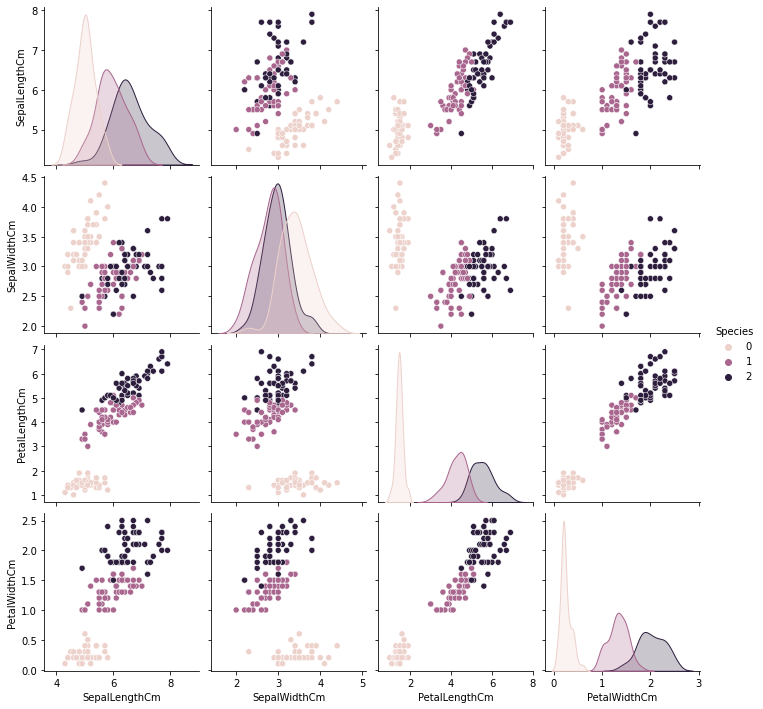

In [6]:
import seaborn as sns
sns.pairplot(data=df, hue='Species')

In [7]:
X = df.drop(columns=['Species'])

In [8]:
k = range(1, 11)
sum_of_square_error = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X)
    sum_of_square_error.append(model.inertia_)
sum_of_square_error

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428572,
 46.53558205128205,
 39.19708292889163,
 34.33285841694538,
 30.14566195077065,
 28.17824534776581,
 25.901016317016317]

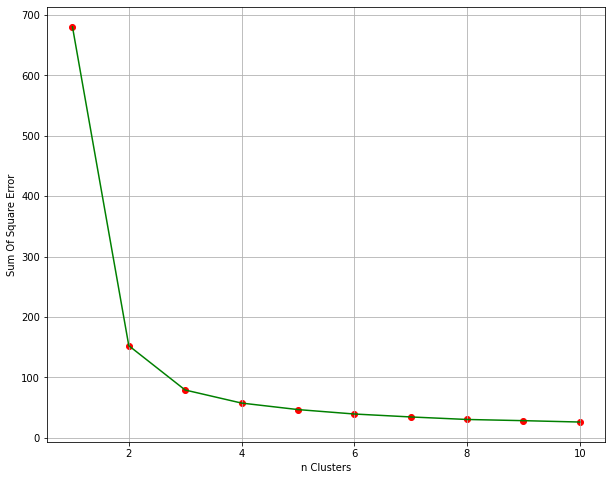

In [9]:
fig = plt.figure(figsize=(10, 8))
plt.plot(k, sum_of_square_error, color='green')
plt.scatter(k, sum_of_square_error, color='red', marker='o')
plt.xlabel('n Clusters')
plt.ylabel('Sum Of Square Error')
plt.grid(True)

In [10]:
model = KMeans(n_clusters=3)
model.fit(X)
model.inertia_

78.94084142614601

In [11]:
model.predict(X)

array([0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2], dtype=int32)

In [12]:
pred = pd.DataFrame({"Pred": model.predict(X)})
pred.head()

,Pred
0,0
1,0
2,1
3,1
4,2


In [13]:
df['Pred1'] = pred['Pred']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Pred1
49,5.0,3.3,1.4,0.2,0,2
43,5.0,3.5,1.6,0.6,0,2
91,6.1,3.0,4.6,1.4,1,2
75,6.6,3.0,4.4,1.4,1,1
100,6.3,3.3,6.0,2.5,2,1


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Species'], df['Pred1'])

0.3333333333333333

In [15]:
X = df.drop(columns=['Species', 'Pred1'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
k = range(1, 11)
sum_of_square_error = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X)
    sum_of_square_error.append(model.inertia_)
sum_of_square_error

[41.138172022977756,
 12.14368828157972,
 6.998114004826762,
 5.532831003081897,
 4.571180508755745,
 3.9779825965968247,
 3.461979282826061,
 3.126272339885999,
 2.81909505032155,
 2.533777376537663]

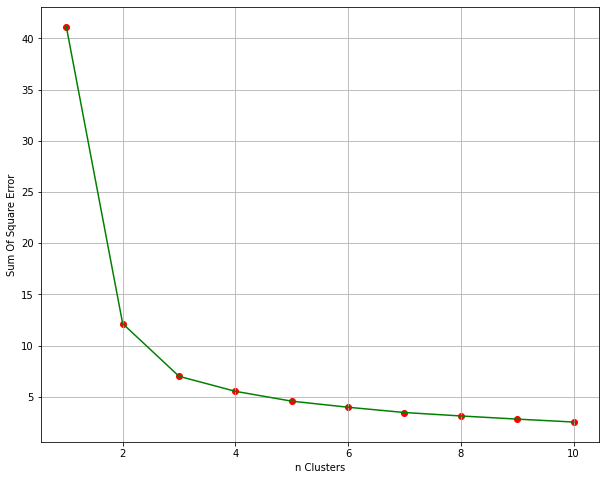

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.plot(k, sum_of_square_error, color='green')
plt.scatter(k, sum_of_square_error, color='red', marker='o')
plt.xlabel('n Clusters')
plt.ylabel('Sum Of Square Error')
plt.grid(True)

In [18]:
model = KMeans(n_clusters=3)
model.fit(X)
model.inertia_

6.998114004826762

In [19]:
model.predict(X)

array([0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2], dtype=int32)

In [20]:
pred = pd.DataFrame({"Pred": model.predict(X)})
pred.head()

,Pred
0,0
1,0
2,1
3,1
4,2


In [21]:
df['Pred2'] = pred['Pred']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Pred1,Pred2
49,5.0,3.3,1.4,0.2,0,2,2
43,5.0,3.5,1.6,0.6,0,2,2
91,6.1,3.0,4.6,1.4,1,2,2
75,6.6,3.0,4.4,1.4,1,1,1
100,6.3,3.3,6.0,2.5,2,1,1


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Species'], df['Pred2'])

0.3333333333333333

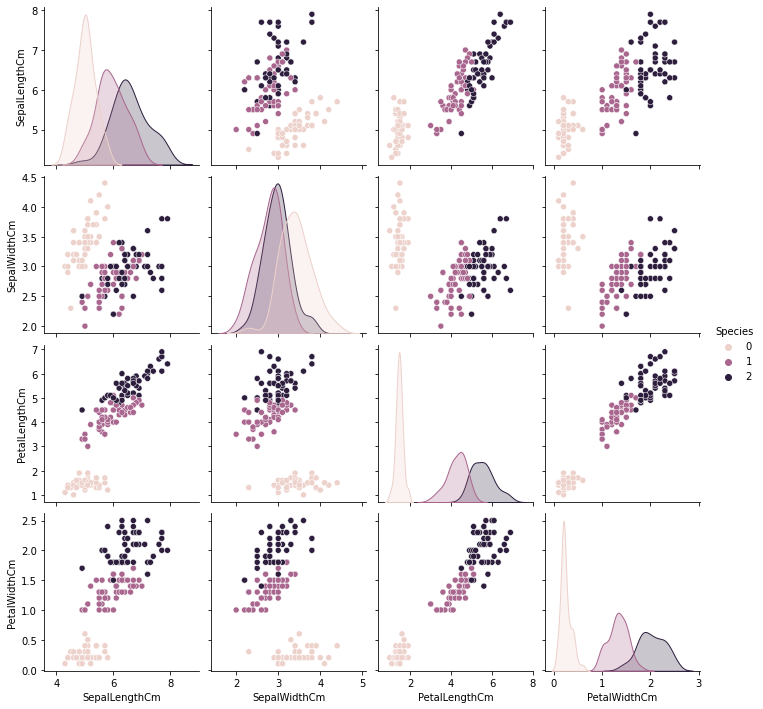

In [23]:
sns.pairplot(data=df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species')

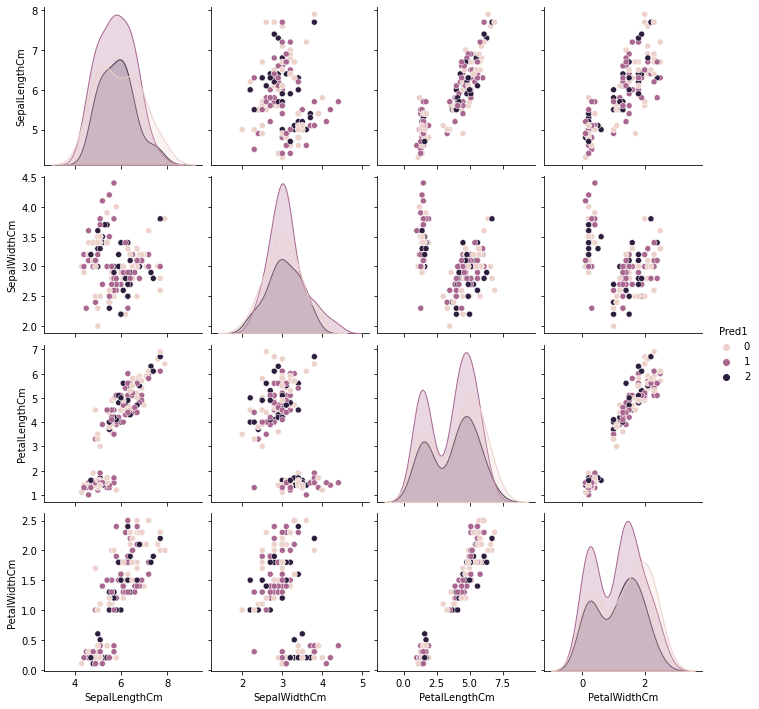

In [24]:
sns.pairplot(data=df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Pred1')

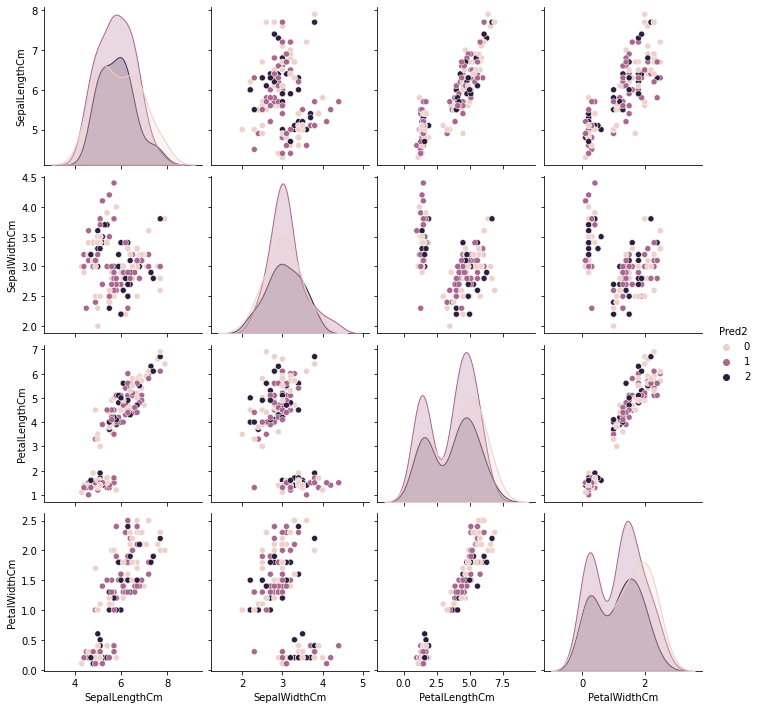

In [25]:
sns.pairplot(data=df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Pred2')